타이타닉 생존 예측 - Tree

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [4]:
df = pd.read_csv('titanic.csv')
df.shape

(887, 8)

In [7]:
df.Name.nunique()

887

In [8]:
df = df.set_index('Name')

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [12]:
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Siblings', 'Parents', 'Fare']

In [15]:
df.Survived.mean() # 38% 생존

0.3855693348365276

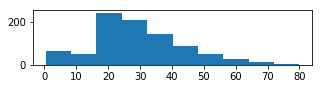

In [30]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Age'].values)

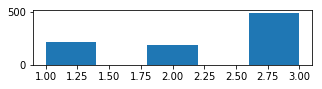

In [33]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Pclass'].values, bins=5)

In [38]:
df['Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

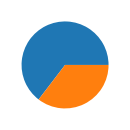

In [40]:
plt.figure(figsize=(5,2))
p = plt.pie(df['Sex'].value_counts())

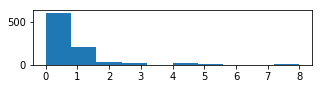

In [43]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Siblings'].values)

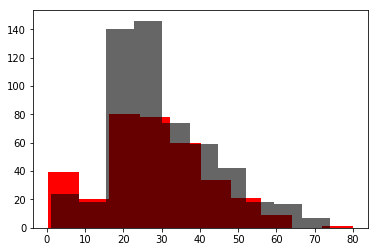

In [53]:
p = plt.hist(df[df['Survived']==1]['Age'].values, color='red')
p = plt.hist(df[df['Survived']==0]['Age'].values, color='black', alpha=0.6)

In [54]:
df.head(1)

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.25


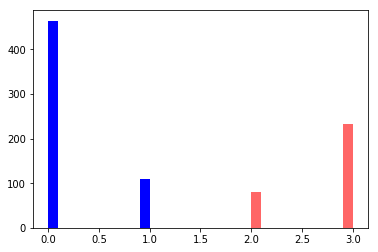

In [61]:
p = plt.hist(df[df['Sex']=='male']['Survived'].values, color='blue')
p = plt.hist(df[df['Sex']=='female']['Survived'].values+2, color='red', alpha=0.6)

In [68]:
# 1,2,3 등석은 범주형입니다
df['Pclass'] = df['Pclass'].astype('object')

In [69]:
data = pd.get_dummies(df)

In [75]:
X = data.drop(columns='Survived')
y = data['Survived']

In [87]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(X, y)
model.score(X, y)

0.8489289740698985

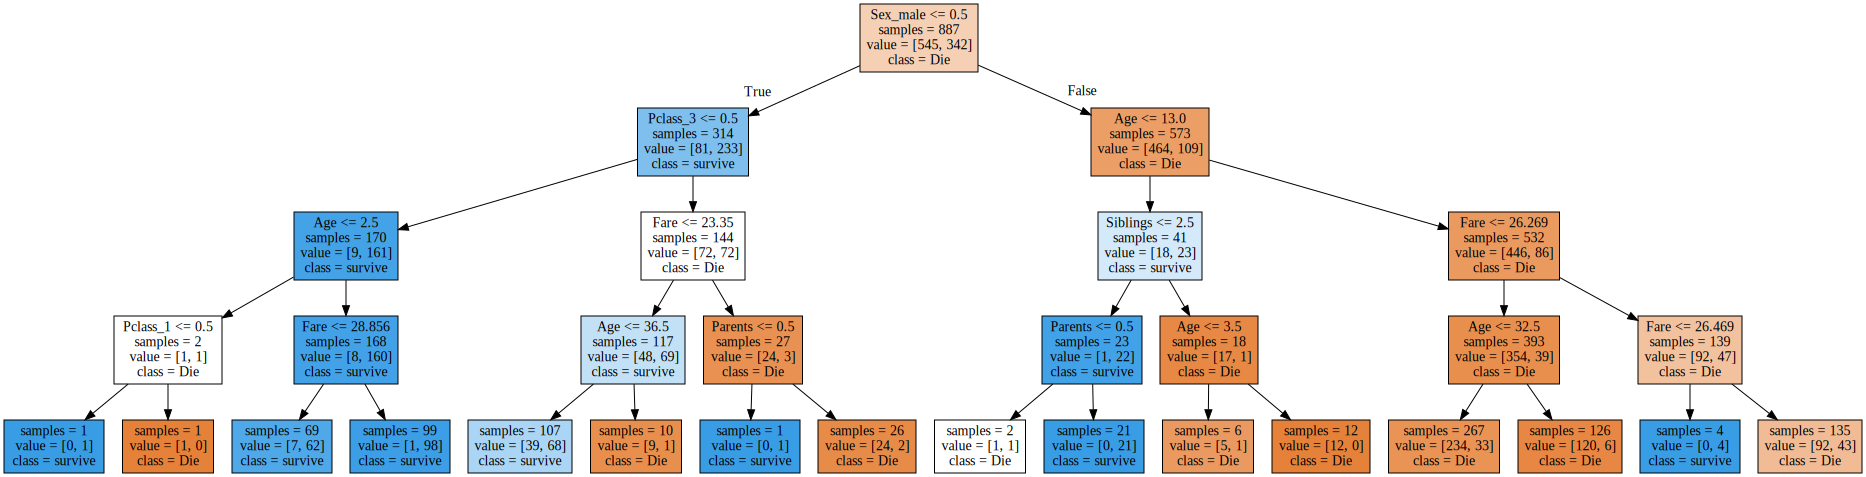

In [88]:
export_graphviz(model, out_file='titanic.dot', class_names=['Die','survive'],
               feature_names=X.columns, impurity=False, filled=True)
with open('titanic.dot') as f:
    dot_graph = f.read()    
display(graphviz.Source(dot_graph))

In [146]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [147]:
#누락 데이터 체크
loans.isna().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not.fully.paid        0
dtype: int64

In [148]:
loans = loans.dropna()
loans.isna().sum().sum()

0

In [149]:
loans['not.fully.paid'].mean()

0.1598360655737705

In [150]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [155]:
loans.groupby('purpose')['not.fully.paid'].mean()

purpose
all_other             0.165502
credit_card           0.115171
debt_consolidation    0.152190
educational           0.202941
home_improvement      0.168790
major_purchase        0.113426
small_business        0.278317
Name: not.fully.paid, dtype: float64

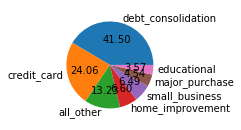

In [113]:
plt.figure(figsize=(2,2))
p = plt.pie(loans.purpose.value_counts(),labels=loans.purpose.unique(),
            autopct='%.2f')

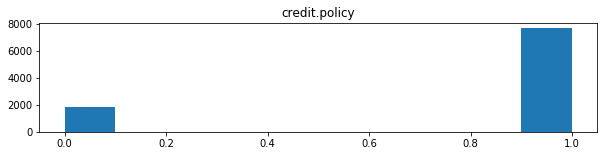

In [140]:
plt.figure(figsize=(10,2))
p = plt.hist(loans['credit.policy'])
p = plt.title('credit.policy')

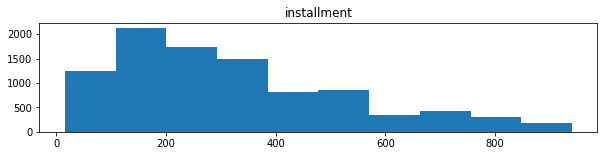

In [120]:
plt.figure(figsize=(10,2))
p = plt.hist(loans['installment'])
p = plt.title('installment')

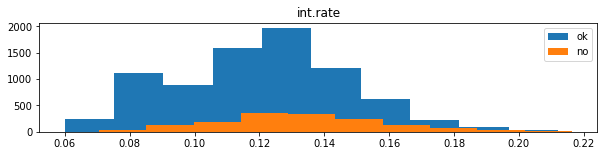

In [129]:
plt.figure(figsize=(10,2))
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==1], label='no')
p = plt.title('int.rate')
p = plt.legend()

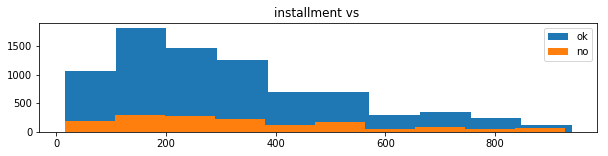

In [128]:
plt.figure(figsize=(10,2))
# 데이터[조건]
p = plt.hist(loans['installment'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['installment'][loans['not.fully.paid']==1], label='no')
p = plt.title('installment vs ')
p = plt.legend()

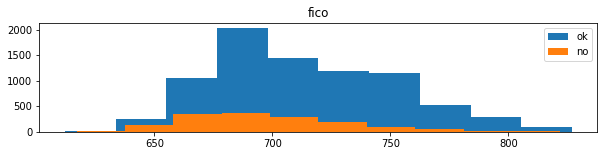

In [144]:
plt.figure(figsize=(10,2))
# 데이터[조건]
p = plt.hist(loans['fico'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['fico'][loans['not.fully.paid']==1], label='no')
p = plt.title('fico')
p = plt.legend()

In [139]:
loans['credit.policy'].unique()

array([1, 0], dtype=int64)

In [130]:
loans = pd.get_dummies(loans)#카테고리를 원핫 인코딩

In [133]:
X = loans.drop(columns='not.fully.paid')
y = loans['not.fully.paid']

In [137]:
model = DecisionTreeClassifier(max_depth=5).fit(X,y)
model.score(X,y)

0.8456284153005464

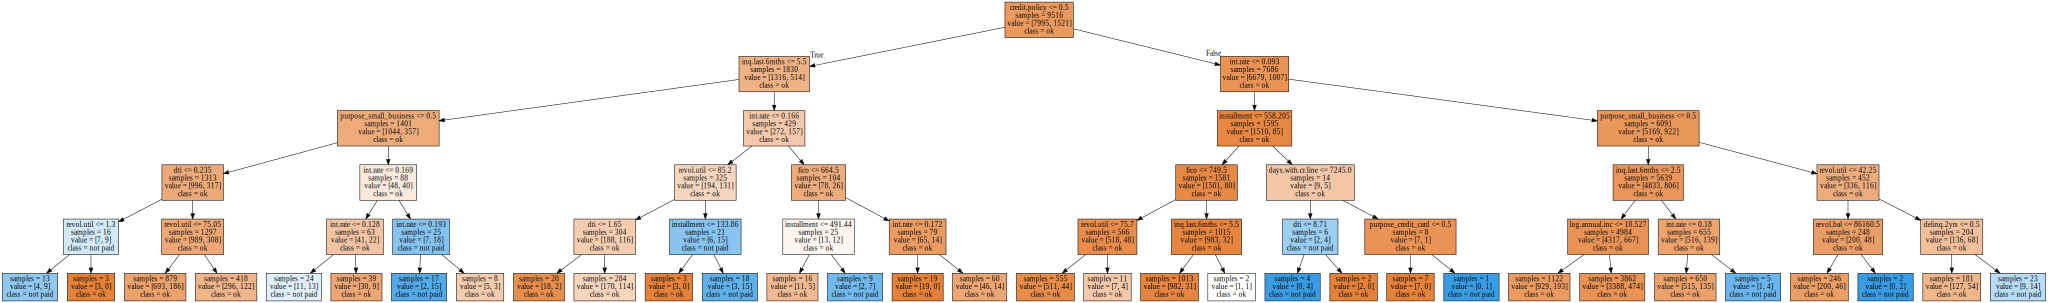

In [136]:
export_graphviz(model, out_file='loan.dot', class_names=['ok','not paid'],
               feature_names=X.columns, impurity=False, filled=True)
with open('loan.dot') as f:
    dot_graph = f.read()    
display(graphviz.Source(dot_graph))